# Daten und Modelloptimierung - Teil 1

## Quelle der Daten

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data (zuletzt aufgerufen: 01/2024)

https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 (zuletzt aufgerufen: 01/2024)

## Installation der Bibliotheken

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn import svm

from sklearn.model_selection import cross_validate

from sklearn.ensemble import BaggingClassifier

from sklearn.metrics import confusion_matrix

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import plot_roc_curve, auc

ImportError: cannot import name 'plot_confusion_matrix' from 'sklearn.metrics' (C:\Users\Tim\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

## Einlesen der Daten 

In [4]:
data = pd.read_excel("C:\\Users\\...\\Brustkrebs.xlsx", sheet_name = "Tabelle1")

data = data.dropna()

data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\...\\Brustkrebs.xlsx'

In [3]:
data = pd.read_excel("C:\\Users\\Tim\\Desktop\\Buchprojekt KI Medizin\\Programmierung\\Brustkrebs.xlsx", sheet_name = "Tabelle1")

data = data.dropna()

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,malignant,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,malignant,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,malignant,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,malignant,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,malignant,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
diagnosis_new = {"benign": 0, "malignant": 1}

data["diagnosis"] = data["diagnosis"].replace(diagnosis_new)

data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

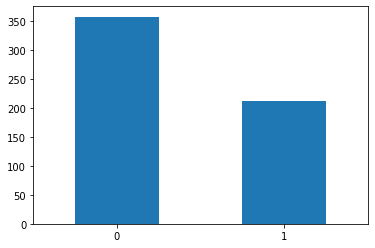

In [6]:
count_diabetes = data["diagnosis"].value_counts()

count_diabetes.plot(kind = "bar", rot = 0)

## Aufteilung der Daten und Resampling

In [7]:
x = data.iloc[:, 1:]

y = data.iloc[:, 0]

In [8]:
x.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.15)

In [ ]:
# Nicht verwendet, da die Daten ausreichend balanciert sind

sm = SMOTE()

x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

print(y_train_res.value_counts())

## Erstellen und Trainieren des KI-Modells

In [11]:
model = svm.SVC(kernel = "linear")

model.fit(x_train, y_train)

SVC(kernel='linear')

## Cross Validation

In [12]:
scores = cross_validate(model, x, y, scoring = "accuracy", cv = 10)

print(scores["test_score"])

print("Gesamt-Accuracy:", sum(scores["test_score"])/float(len(scores["test_score"])))

[0.98245614 0.92982456 0.92982456 0.94736842 0.96491228 0.98245614
 0.92982456 0.94736842 0.96491228 0.96428571]
Gesamt-Accuracy: 0.9543233082706767


## Bagging

In [13]:
bagging = BaggingClassifier(model, n_estimators = 10, max_samples = 8, bootstrap = True)

bagging.fit(x_train, y_train)

print("Accuracy:", bagging.score(x_test, y_test))

Accuracy: 0.9069767441860465


## Modellevaluation

In [14]:
print("Accuracy:", model.score(x_test, y_test))

Accuracy: 0.9418604651162791


In [12]:
y_pred = model.predict(x_test)

confusion_matrix(y_test, y_pred)

array([[55,  0],
       [ 5, 48]], dtype=int64)

In [ ]:
confusion_matrix = plot_confusion_matrix(model, x_test, y_test)

confusion_matrix.ax_.set_title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.show()

In [ ]:
#Sensitivität = RP/(RP+FN)
print("Sensitivity:", 50/(50+4))

#Spezifität = RN/(RN+FP)
print("Specificity:", 31/(31+1))

#Positiver Prädiktiver Wert = RP/(RP+FP)
print("Precision/PPW:", 50/(50+1))

#Negativer Prädiktiver Wert = RN/(RN+FN)
print("Recall/NPW:", 31/(31+4))

#F1-Score = 2 * ((PPW * NPW) / (PPW + NPW))
print("F1:", 2*((50/(50+1))*(31/(31+4)))/((50/(50+1))+(31/(31+4))))

In [ ]:
plot_roc_curve(model, x_test, y_test)